# Our first real exercise with rdkit

In [37]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [38]:
m = Chem.MolFromSmiles("C(=O)c1ccccc1")

In [39]:
# almost same molecule
m1 = Chem.MolFromSmiles("c1ccccc1C(=O)")

In [40]:
# completely different molecule
cdm = Chem.MolFromSmiles("c1ccccc1C(=O)CCC1CC1")

In [41]:
# compare
print(Chem.MolToSmiles(m), Chem.MolToSmiles(m1))
# with
print(Chem.MolToSmiles(m, canonical=False), Chem.MolToSmiles(m1, canonical=False))
# Do you remeber from lectures what cononical means?

O=Cc1ccccc1 O=Cc1ccccc1
C(=O)c1ccccc1 c1ccccc1C=O


In [42]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  3  1  0
M  END



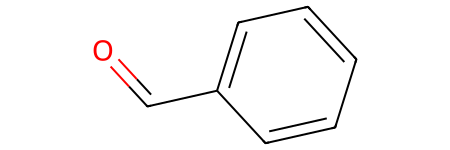

In [43]:
# rdkit can show your molecule (since 2019 without any manually added methods)
m

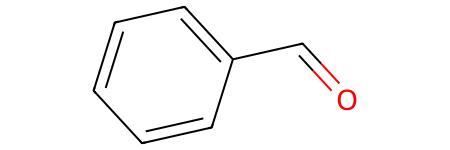

In [34]:
# looks almost the same, but different atom numbering
m1

## How to calculate all rings in drug bank?
Firstly, how can we work with rings

In [17]:
ri=m.GetRingInfo()
ri.AtomRings()

((2, 7, 6, 5, 4, 3),)

In [18]:
# can you see different ids of atoms in the ring?
ri=m1.GetRingInfo()
ri.AtomRings()

((0, 5, 4, 3, 2, 1),)

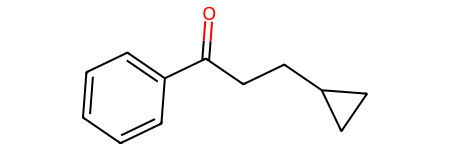

In [19]:
# advanced molecule
cdm

In [35]:
# SSSR = smallest set of smallest rings
Chem.GetSSSR(m), Chem.GetSSSR(m1), Chem.GetSSSR(cdm)

(<rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb375337c0>,
 <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37533e40>)

In [36]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')  # Default working directory is where the notebook is
drugs = [m for m in suppl if not m == None]  # supplier sometimes returns None, you can see many errors below

#drugs = []
#for m in suppl:
#    drug.append(m)

[12:24:46] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:24:46] ERROR: Could not sanitize molecule ending on line 20009
[12:24:46] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:24:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:24:47] ERROR: Could not sanitize molecule ending on line 250947
[12:24:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:24:47] Explicit valence for atom # 17 O, 3, is greater than permitted
[12:24:47] ERROR: Could not sanitize molecule ending on line 258130
[12:24:47] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[12:24:47] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:24:47] ERROR: Could not sanitize molecule ending on line 261581
[12:24:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:24:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[12:24:47] ERROR: Coul

We obtained so many drugs

In [22]:
len(drugs)

7117

With SSSR algorithm, we can calculate all rings

In [23]:
rings = [Chem.GetSSSR(drug) for drug in drugs]

In [49]:
Chem.GetSSSR(drugs[0])

In [24]:
rings[:10]

In [25]:
[(m,r) for m, r in zip(drugs, rings[:10])]

[(<rdkit.Chem.rdchem.Mol at 0x7fdb5448eb20>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37532bc0>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448eab0>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37532740>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448eb90>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb375329c0>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448ec00>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb375331c0>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448ec70>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37532f40>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448e9d0>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37533240>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448e8f0>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb375442c0>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448ece0>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37544440>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448ed50>,
  <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7fdb37544240>),
 (<rdkit.Chem.rdchem.Mol at 0x7fdb5448edc0>,
  <rdkit.r

Sum of all rings give us

In [48]:
sum(rings)

TypeError: unsupported operand type(s) for +: 'int' and '_vectSt6vectorIiSaIiEE'

Average per compound

In [ ]:
sum(rings)/len(drugs)

2.4687280393534787